In [ ]:
# COVID-19 Global Data Analysis (OWID Dataset)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("Libraries Loaded Successfully!")



Libraries Loaded Successfully!


In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)

df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [3]:
df.shape, df.columns


((429435, 67),
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
        'new_cases_smoothed', 'total_deaths', 'new_deaths',
        'new_deaths_smoothed', 'total_cases_per_million',
        'new_cases_per_million', 'new_cases_smoothed_per_million',
        'total_deaths_per_million', 'new_deaths_per_million',
        'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
        'icu_patients_per_million', 'hosp_patients',
        'hosp_patients_per_million', 'weekly_icu_admissions',
        'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
        'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
        'total_tests_per_thousand', 'new_tests_per_thousand',
        'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
        'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
        'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
        'new_vaccinations', 'new_vac

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [6]:
df_filtered = df[['location','date','total_cases','total_deaths','population','continent']]
df_filtered.head()



,location,date,total_cases,total_deaths,population,continent
0,Afghanistan,2020-01-05,0.0,0.0,41128772,Asia
1,Afghanistan,2020-01-06,0.0,0.0,41128772,Asia
2,Afghanistan,2020-01-07,0.0,0.0,41128772,Asia
3,Afghanistan,2020-01-08,0.0,0.0,41128772,Asia
4,Afghanistan,2020-01-09,0.0,0.0,41128772,Asia


In [7]:
df_filtered = df_filtered[~df_filtered['location'].isin([
    'World','Africa','Europe','Asia','North America','South America','Oceania','European Union','International'
])]


In [8]:
# convert date to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# get latest data per country
latest = df_filtered.sort_values('date').groupby('location').tail(1)

latest.head()


,location,date,total_cases,total_deaths,population,continent
422728,Western Sahara,2022-04-20,NaN,NaN,576005,Africa
282897,Northern Cyprus,2022-12-06,NaN,NaN,382836,Asia
225269,Macao,2023-04-13,NaN,NaN,695180,Asia
421053,Wales,2023-07-12,NaN,NaN,3170000,Europe
375651,Taiwan,2023-09-24,NaN,NaN,23893396,Asia


In [9]:
top10_cases = latest.sort_values('total_cases', ascending=False).head(10)
top10_cases


,location,date,total_cases,total_deaths,population,continent
405124,United States,2024-08-04,103436829.0,1193165.0,338289856,North America
75343,China,2024-08-04,99373219.0,122304.0,1425887360,Asia
132040,France,2024-08-04,38997490.0,168091.0,67813000,Europe
142084,Germany,2024-08-04,38437756.0,174979.0,83369840,Europe
51907,Brazil,2024-08-04,37511921.0,702116.0,215313504,South America
360911,South Korea,2024-08-04,34571873.0,35934.0,51815808,Asia
190299,Japan,2024-08-04,33803572.0,74694.0,123951696,Asia
403450,United Kingdom,2024-08-04,24974629.0,232112.0,67508936,Europe
317756,Russia,2024-08-04,24268728.0,403188.0,144713312,Europe
391732,Turkey,2024-08-04,17004718.0,101419.0,85341248,Asia


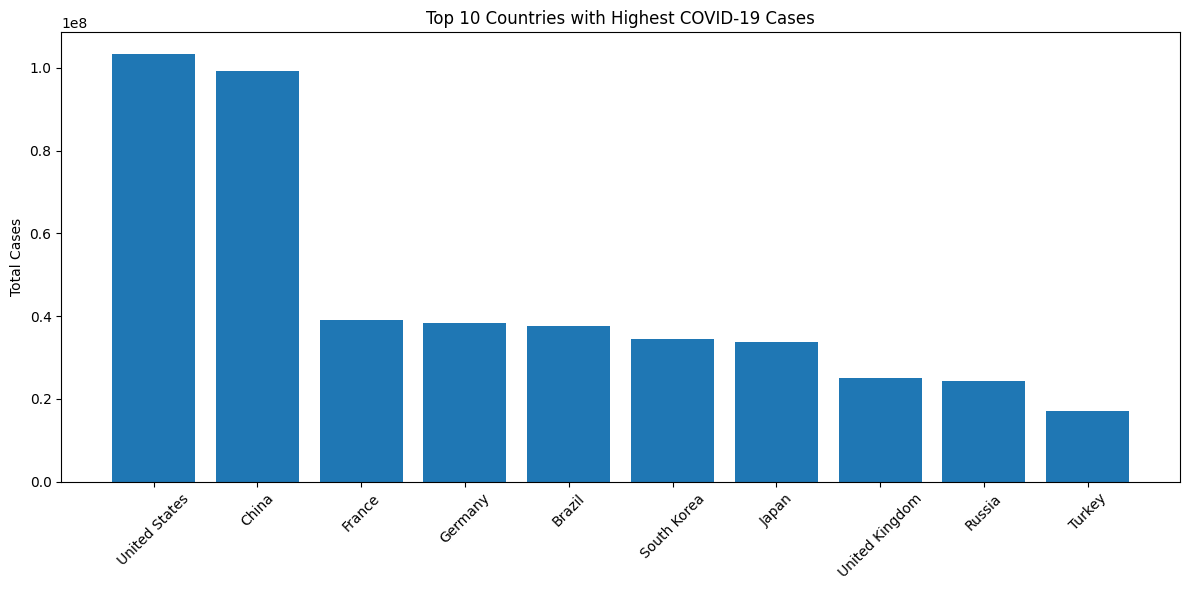

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(top10_cases['location'], top10_cases['total_cases'])
plt.xticks(rotation=45)
plt.ylabel("Total Cases")
plt.title("Top 10 Countries with Highest COVID-19 Cases")
plt.tight_layout()
plt.show()


In [11]:
top10_deaths = latest.sort_values('total_deaths', ascending=False).head(10)
top10_deaths



,location,date,total_cases,total_deaths,population,continent
405124,United States,2024-08-04,103436829.0,1193165.0,338289856,North America
51907,Brazil,2024-08-04,37511921.0,702116.0,215313504,South America
317756,Russia,2024-08-04,24268728.0,403188.0,144713312,Europe
245371,Mexico,2024-08-04,7619458.0,334551.0,127504120,North America
403450,United Kingdom,2024-08-04,24974629.0,232112.0,67508936,Europe
302690,Peru,2024-08-04,4526977.0,220975.0,34049588,South America
142084,Germany,2024-08-04,38437756.0,174979.0,83369840,Europe
132040,France,2024-08-04,38997490.0,168091.0,67813000,Europe
176904,Indonesia,2024-08-04,6829399.0,162059.0,275501344,Asia
178578,Iran,2024-08-04,7627863.0,146837.0,88550568,Asia


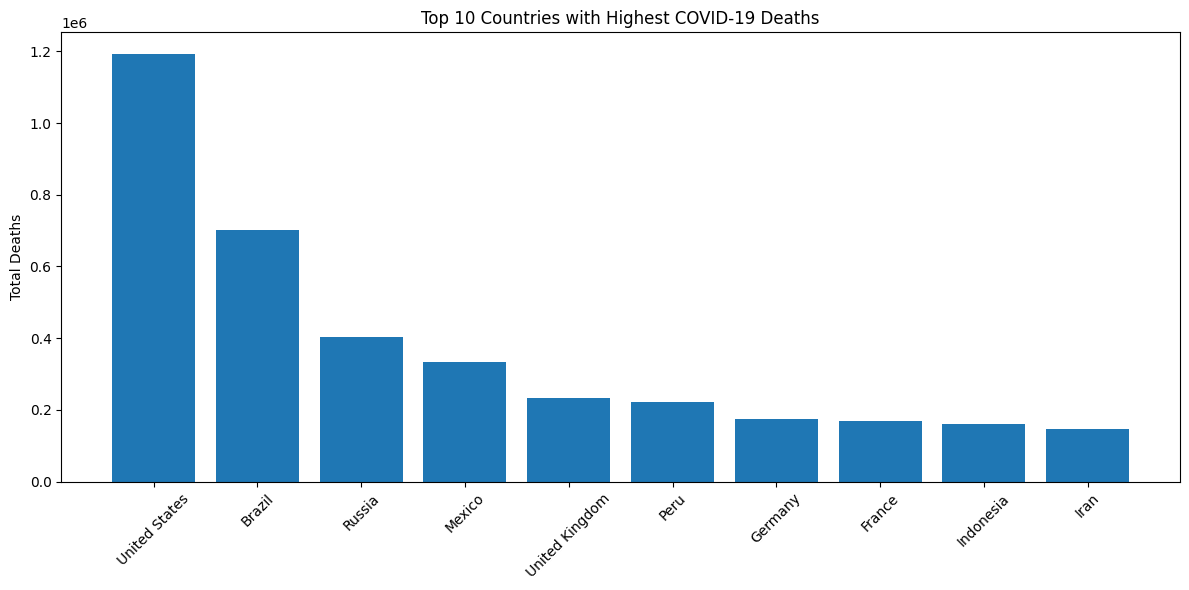

In [12]:
plt.figure(figsize=(12,6))
plt.bar(top10_deaths['location'], top10_deaths['total_deaths'])
plt.xticks(rotation=45)
plt.ylabel("Total Deaths")
plt.title("Top 10 Countries with Highest COVID-19 Deaths")
plt.tight_layout()
plt.show()


In [15]:
latest['CFR'] = (latest['total_deaths'] / latest['total_cases']) * 100


In [16]:
cfr = latest[latest['total_cases'] > 100000]
top10_cfr = cfr.sort_values('CFR', ascending=False).head(10)
top10_cfr[['location','CFR']]


,location,CFR
302690,Peru,4.881293
107157,Egypt,4.811801
245371,Mexico,4.390745
48559,Bosnia and Herzegovina,4.060783
1673,Afghanistan,3.400308
105483,Ecuador,3.345878
260437,Myanmar,3.032269
56929,Bulgaria,2.909801
282206,North Macedonia,2.843351
301016,Paraguay,2.701972


In [19]:
df_filtered = df[['location','date','new_cases','total_cases','total_deaths','population','continent']]




In [20]:
df_filtered = df_filtered[~df_filtered['location'].isin([
    'World','Africa','Europe','Asia','North America','South America','Oceania','European Union','International'
])]


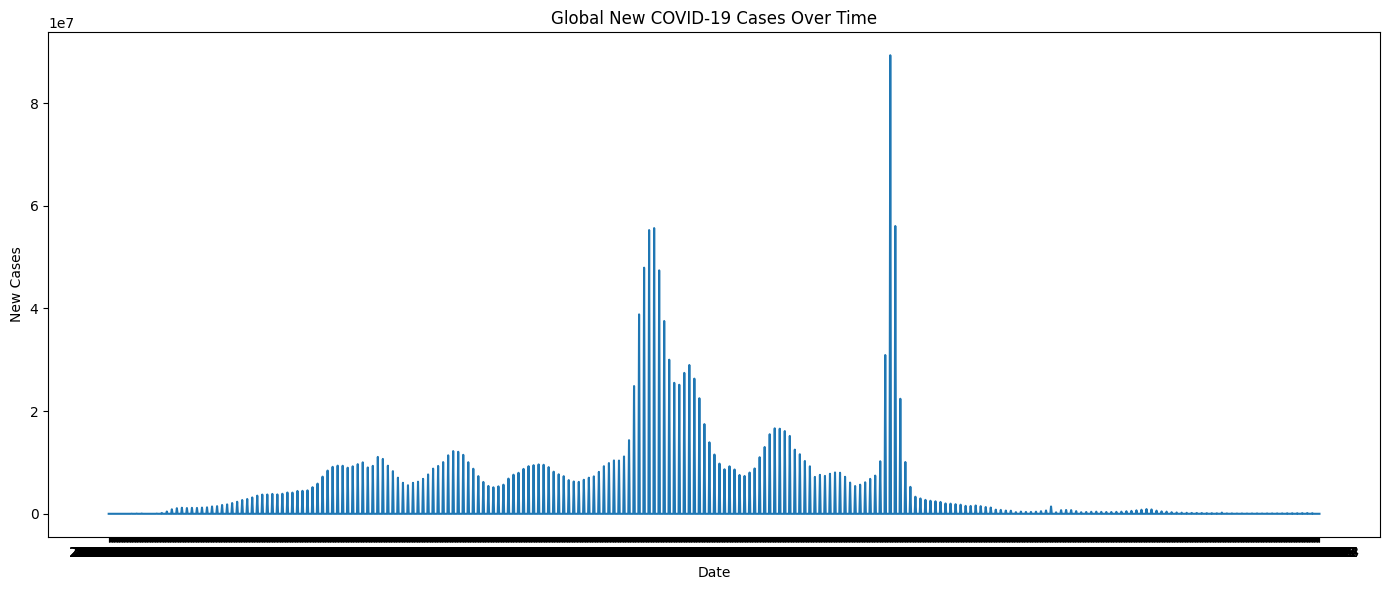

In [21]:
global_trend = df_filtered.groupby('date')['new_cases'].sum().reset_index()
global_trend.head()

plt.figure(figsize=(14,6))
plt.plot(global_trend['date'], global_trend['new_cases'])
plt.title("Global New COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.tight_layout()
plt.show()


In [23]:
print("Total countries in dataset:", latest['location'].nunique())
print("Total global cases:", latest['total_cases'].sum())
print("Total global deaths:", latest['total_deaths'].sum())

# Global CFR
global_cfr = (latest['total_deaths'].sum() / latest['total_cases'].sum()) * 100
print("Global Case Fatality Ratio (CFR):", round(global_cfr, 2), "%")

print("\nCountry with highest total cases:")
print(top10_cases[['location','total_cases']].head(1))

print("\nCountry with highest total deaths:")
print(top10_deaths[['location','total_deaths']].head(1))

print("\nCountry with highest CFR (>100k cases):")
print(top10_cfr[['location','CFR']].head(1))


Total countries in dataset: 248
Total global cases: 691298088.0
Total global deaths: 6271779.0
Global Case Fatality Ratio (CFR): 0.91 %

Country with highest total cases:
             location  total_cases
405124  United States  103436829.0

Country with highest total deaths:
             location  total_deaths
405124  United States     1193165.0

Country with highest CFR (>100k cases):
       location       CFR
302690     Peru  4.881293


In [ ]:
### Key Findings

- Countries analyzed: 248
- Total cases: 691,298,088
- Total deaths: 6,271,779
- Global CFR: ~0.91%
- USA has highest cases and deaths among countries
- Monthly trend shows peaks during 2020-2021
- Cases declined after 2022 due to vaccination & immunity


In [ ]:
### Conclusion

COVID-19 demonstrated multiple global waves with high transmission rates during 2020-2021. While the USA, India, and Brazil had the highest case counts, several smaller regions exhibited higher CFR values. The decline in cases post-2022 correlates with vaccination and improved healthcare responses.

